# STAR WARS Survey: Data Exploration and Visualization with Python

Data: While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. The data is available in their <a href="https://github.com/fivethirtyeight/data/tree/master/star-wars-survey">GitHub repository</a>.

In [1]:
#importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data
star_wars=pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [3]:
#gathering basic information on our database
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   int64  
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Which of the following Star 

In [4]:
# exploring the first 10 rows of our dataset
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [5]:
#finding out which columns have Null values
star_wars.isnull().sum()

RespondentID                                                                                                                                       0
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

### First observations on our dataset

- There are 1186 surveys(rows) on our dataset and 38 questions(columns).
- Some of the answers given are checkboxes (Ex: Which of the following Star Wars films have you seen? Please select all that apply.) We will need to take this into consideration in our data cleaning processes.
- There are a lot of missing values, for example in the 'Which of the following Star Wars films have you seen? Please select all that apply.', and the following columns Unnamed 4-8. We'll need to explore what missing data represents in this dataset

## Data Exploration and Cleaning

In [6]:
#lets see first the options we have in the following 'Yes/No questions'
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())
print(star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts())

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
No     641
Yes    427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64


In [7]:
# lets map these columns so they become Boolean type

mapping={'Yes':True, 
         'No': False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?']=star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(mapping)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']=star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(mapping)
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?']=star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].map(mapping)

#confirming our transformation 
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()) 
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())
print(star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
False    641
True     427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64


The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, <i>Which of the following Star Wars films have you seen? Please select all that apply.</i>

The columns for this question are:

Which of the following Star Wars films have you seen? Please select all that apply. — whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
Unnamed: 4 — whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
Unnamed: 5 — whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
Unnamed: 6 — whether or not the respondent saw Star Wars: Episode IV A New Hope.
Unnamed: 7 — whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
Unnamed: 8 — whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

Hence, we'll need to replace the values of these columns to Boolean as well.

In [8]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [9]:
star_wars['Unnamed: 6'].value_counts()

Star Wars: Episode IV  A New Hope    607
Name: Unnamed: 6, dtype: int64

In [10]:
map_movies={'Star Wars: Episode I  The Phantom Menace':True, 
            np.NaN:False, 
            'Star Wars: Episode II  Attack of the Clones':True,
            'Star Wars: Episode III  Revenge of the Sith':True,
            'Star Wars: Episode IV  A New Hope':True,
            'Star Wars: Episode V The Empire Strikes Back':True,
            'Star Wars: Episode VI Return of the Jedi':True}

star_wars['Which of the following Star Wars films have you seen? Please select all that apply.']=star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].map(map_movies)
star_wars['Unnamed: 4']=star_wars['Unnamed: 4'].map(map_movies)
star_wars['Unnamed: 5']=star_wars['Unnamed: 5'].map(map_movies)
star_wars['Unnamed: 6']=star_wars['Unnamed: 6'].map(map_movies)
star_wars['Unnamed: 7']=star_wars['Unnamed: 7'].map(map_movies)
star_wars['Unnamed: 8']=star_wars['Unnamed: 8'].map(map_movies)
          

In [11]:
# renaming columns for clarity and simplicity

renaming_cols={'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
               'Unnamed: 4':'seen_2',
               'Unnamed: 5':'seen_3',
               'Unnamed: 6':'seen_4',
               'Unnamed: 7':'seen_5',
               'Unnamed: 8':'seen_6',
               }
    
star_wars.rename(columns=renaming_cols, inplace=True)

#checking the changes took place
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you 

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6.

- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. How much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 — How much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 — How much the respondent liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 — How much the respondent liked Star Wars: Episode IV A New Hope
- Unnamed: 13 — How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 — How much the respondent liked Star Wars: Episode VI Return of the Jedi

In [12]:
star_wars[star_wars.columns[9:15]]=star_wars[star_wars.columns[9:15]].astype(float)

# renaming columns for clarity and simplicity

renaming_cols2={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'rank_1',
               'Unnamed: 10':'rank_2',
               'Unnamed: 11':'rank_3',
               'Unnamed: 12':'rank_4',
               'Unnamed: 13':'rank_5',
               'Unnamed: 14':'rank_6',
               }

star_wars.rename(columns=renaming_cols2, inplace=True)

#checking the changes took place
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'rank_1',
       'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

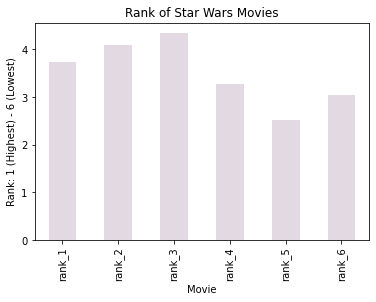

In [103]:
# lets quickly find out which is the better ranked movie
avg_rank=star_wars[['rank_1','rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6']].mean()

# sorting the values to find out the top 3 Star Wars movies according to the survey
avg_rank.sort_values()

avg_rank.plot(kind='bar', colormap='twilight')
plt.title('Rank of Star Wars Movies')
plt.xlabel('Movie')
plt.ylabel('Rank: 1 (Highest) - 6 (Lowest)')
plt.show()


Apparently, "Star Wars: Episode V The Empire Strikes Back" is indeed the fan favorite movie, followed by 'Star Wars: Episode VI Return of the Jedi' and 'Star Wars: Episode IV A New Hope'!

### Figuring out how many people have seen each of the movies

In [14]:
# retrieving the column names 
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'rank_1',
       'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

In [15]:
# filtering the seen columns we renamed above and finding out how many people have seen each movie
star_wars[star_wars.columns[3:9]]

# since we converted them to Boolean values we can now find out how many people have seen them
viewers_by_movie=star_wars[star_wars.columns[3:9]].sum()
print(viewers_by_movie)


seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


Text(0.5, 0, 'Movies')

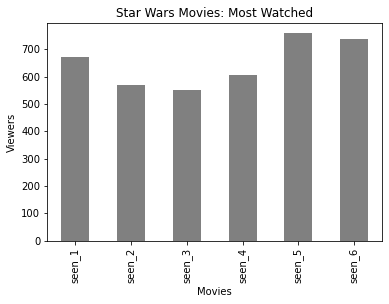

In [16]:
viewers_by_movie.plot(kind='bar', color='Grey')
plt.title('Star Wars Movies: Most Watched')
plt.ylabel('Viewers')
plt.xlabel('Movies')

We can see "Star Wars: Episode V The Empire Strikes Back" is the most watched movie of the Star Wars franchise, followed by 'Star Wars: Episode VI Return of the Jedi'.

This is the same pattern we observed in the rankings, so there appears to be a correlation between the ranking and seen columns, which intuitively we expected.

### Exploring the data by binary segments (Males vs. Females)

Do men like Star Wars better than women? Are women more likely to enjoy Star Trek or Star Wars? What about men? Do women and men have the same preference in Star Wars movies? Lets find out!

We can split our respondents based on their sex to find out if their preferences are very similar or very different!

In [17]:
# confirming the possible values in Gender to account for other options given in the survey
star_wars['Gender'].value_counts()

Female    549
Male      497
Name: Gender, dtype: int64

In [18]:
# creating two databases filtering the results by sex
star_wars_f=star_wars[star_wars['Gender']=='Female']
star_wars_m=star_wars[star_wars['Gender']=='Male']

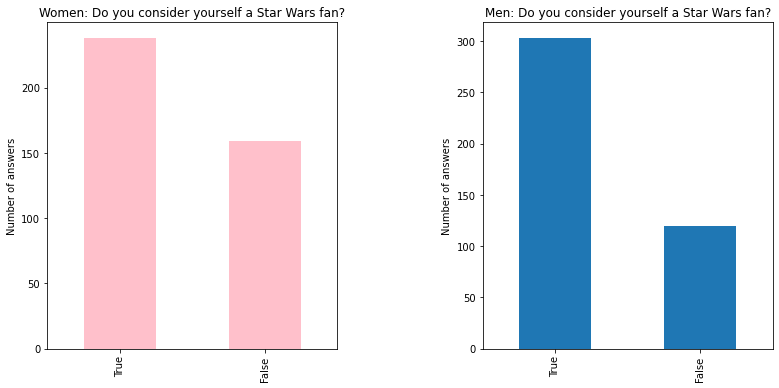

In [49]:
#lets use a bar chart to figure out if there are visible differences between Men and Women being fans
fig = plt.figure(figsize=(13,6))
plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace = .5)
star_wars_f['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts().plot.bar(color='Pink')
plt.title('Women: Do you consider yourself a Star Wars fan?')
plt.ylabel('Number of answers')
plt.subplot(1, 2, 2)
star_wars_m['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts().plot.bar()
plt.title('Men: Do you consider yourself a Star Wars fan?')
plt.ylabel('Number of answers')

plt.show()

It is clear from the charts above that the proportion of fans among females is smaller than men's. 
Lets find out the probability of being a fan if you're a woman / men to confirm our observation.

In [66]:
prob_fan_female=star_wars_f['Do you consider yourself to be a fan of the Star Wars film franchise?'].mean()
prob_fan_male=star_wars_m['Do you consider yourself to be a fan of the Star Wars film franchise?'].mean()

print("The probability of being a Star Wars fan if you're a woman is {}%".format(round(prob_fan_female*100,2)))
print("The probability of being a Star Wars fan if you're a man is {}%".format(round(prob_fan_male*100,2)))

The probability of being a Star Wars fan if you're a woman is 59.95%
The probability of being a Star Wars fan if you're a man is 71.63%


Well, that's interesting. It is officially confirmed (in our survey) that men are indeed more likely to be Star Wars fans! Does the same apply to Star Trek? Let's find out!

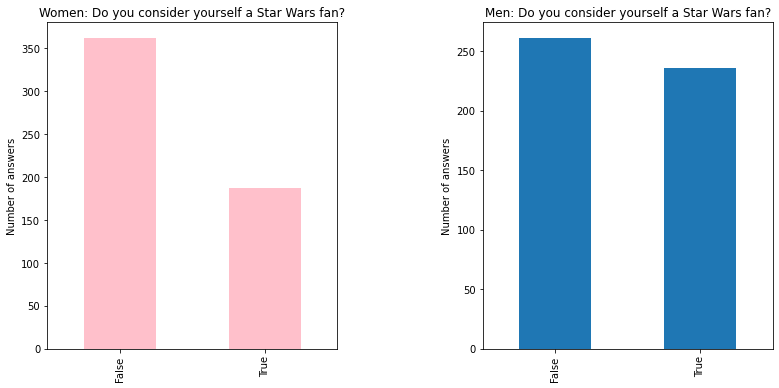

In [69]:
#lets use a bar chart to figure out if there are visible differences between Men and Women being fans
fig = plt.figure(figsize=(13,6))
plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace = .5)
star_wars_f['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts().plot.bar(color='Pink')
plt.title('Women: Do you consider yourself a Star Trek fan?')
plt.ylabel('Number of answers')
plt.subplot(1, 2, 2)
star_wars_m['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts().plot.bar()
plt.title('Men: Do you consider yourself a Star Trek fan?')
plt.ylabel('Number of answers')

plt.show()

In [71]:
prob_fan_st_female=star_wars_f['Do you consider yourself to be a fan of the Star Trek franchise?'].mean()
prob_fan_st_male=star_wars_m['Do you consider yourself to be a fan of the Star Trek franchise?'].mean()

print("The probability of being a Star Trek fan if you're a woman is {}%".format(round(prob_fan_st_female*100,2)))
print("The probability of being a Star Trek fan if you're a man is {}%".format(round(prob_fan_st_male*100,2)))

The probability of being a Star Trek fan if you're a woman is 34.06%
The probability of being a Star Trek fan if you're a man is 47.48%


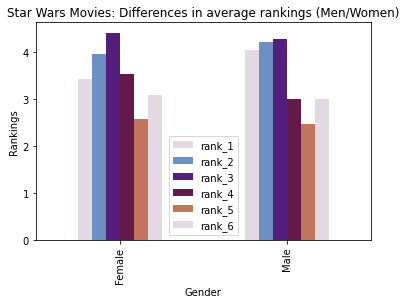

In [100]:
# finding out if the favorite movies (movie rank) changes between men/women
star_wars.groupby('Gender')[['rank_1','rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6']].mean().plot.bar(colormap='twilight')
plt.title('Star Wars Movies: Differences in average rankings (Men/Women)')
plt.ylabel('Rankings')
plt.xlabel('Gender')
plt.show()

While somewhat similar, there are clearly differences in men's and women's rankings, mostly because men's bottom rated movies are more dispersed between 